In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('H://课程//毕业论文//data_ori_cleanded/total_data_1.csv')

In [3]:
df.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,User_listed_count,User_media_count,hateful,aggressive,HorA,care,fairness,loyalty,authority,purity
0,0,2022-02-22,1496090169229058054,Russian troops enter eastern Ukraine russia u...,0,0,0,0,"['Russia', 'Ukraine', 'UkraineConflict', 'Ukra...",HimanRoy14,...,0,364,0,0,0,1.666667,NaN,NaN,4.75,NaN
1,1,2022-02-22,1496093418870951937,"Iran urges restraint in Ukraine crisis, blames...",0,0,0,0,"['Iran', 'UkraineRussiaCrisis', 'Ukraine', 'Uk...",theasialive,...,1,194,0,0,0,NaN,NaN,NaN,NaN,NaN
2,2,2022-02-22,1496094215000195073,Current Affairs emoji cara revolviéndose de l...,22,225,913,21,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCri...",SonaliS71687712,...,0,1072,0,0,0,1.666667,NaN,NaN,NaN,NaN
3,3,2022-02-22,1496094912215130116,russian President vladimir putin has ordered...,1,0,0,0,"['Russian', 'VladimirPutin', 'Ukraine', 'Ukrai...",TheHoardPlanet,...,1,196,0,0,0,1.666667,NaN,NaN,5.25,NaN
4,4,2022-02-22,1496097094352121866,Putin calls Ukrainian statehood a fiction. His...,0,0,1,0,"['Russia', 'RussiaUkraineCrisis', 'RussiaUcrai...",theasialive,...,1,194,0,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df[['care','fairness','loyalty','authority','purity']] = df[['care','fairness','loyalty','authority','purity']].fillna(0)

In [5]:
def normalize_data(data):
    if data ==0:
        return 0
    else:
        return (data-1)/4-1

In [6]:
df.fairness = df.fairness.apply(normalize_data)
df.loyalty = df.loyalty.apply(normalize_data)
df.authority = df.authority.apply(normalize_data)
df.purity = df.purity.apply(normalize_data)
df.care = df.care.apply(normalize_data)

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[['Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count', 'care', 'fairness', 'loyalty',
       'authority', 'purity']].describe()

,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,care,fairness,loyalty,authority,purity
count,9842648.000,9842648.000,9842648.000,9842648.000,9842648.000,9842648.000,9842648.000,9842648.000
mean,0.876,5.320,15.775,-0.182,0.020,0.030,0.023,0.048
std,38.658,248.049,445.013,0.479,0.139,0.209,0.176,0.242
min,0.000,0.000,0.000,-1.000,-0.700,-1.000,-0.950,-0.917
25%,0.000,0.000,0.000,-0.750,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000
max,94566.000,139611.000,347254.000,0.950,1.000,0.975,0.950,1.000


In [8]:
df[['User_id']].value_counts().describe()

count   1431796.000
mean          6.874
std          90.370
min           1.000
25%           1.000
50%           1.000
75%           3.000
max       49280.000
dtype: float64

In [6]:
df.dtypes

Unnamed: 0                 int64
Datetime                  object
Tweet_id                   int64
Tweet_content             object
Tweet_reply_count          int64
Tweet_retweet_count        int64
Tweet_like_count           int64
Tweet_quote_count          int64
Tweet_hashtags            object
Username                  object
User_id                    int64
User_followers_count       int64
User_friends_count         int64
User_statuses_count        int64
User_favourites_count      int64
User_listed_count          int64
User_media_count           int64
hateful                    int64
aggressive                 int64
HorA                       int64
care                     float64
fairness                 float64
loyalty                  float64
authority                float64
purity                   float64
dtype: object

In [7]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_hashtags', 'Username', 'User_id',
       'User_followers_count', 'User_friends_count', 'User_statuses_count',
       'User_favourites_count', 'User_listed_count', 'User_media_count',
       'hateful', 'aggressive', 'HorA', 'care', 'fairness', 'loyalty',
       'authority', 'purity'],
      dtype='object')

In [8]:
df['HorA'].value_counts()

0    9004363
1     838285
Name: HorA, dtype: int64

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

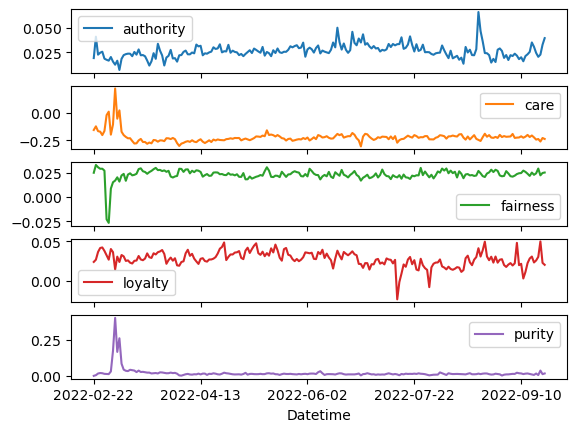

In [8]:
df.pivot_table(index = 'Datetime', values=['authority','care','fairness','loyalty','purity'],
               aggfunc={'authority':np.mean,'care':np.mean,'fairness':np.mean,'loyalty':np.mean,'purity':np.mean,}).plot.line(subplots=True)

In [47]:
df[df['HorA']==1].count()

Unnamed: 0               838285
Datetime                 838285
Tweet_id                 838285
Tweet_content            838285
Tweet_reply_count        838285
Tweet_retweet_count      838285
Tweet_like_count         838285
Tweet_quote_count        838285
Tweet_hashtags           785576
Username                 838285
User_id                  838285
User_followers_count     838285
User_friends_count       838285
User_statuses_count      838285
User_favourites_count    838285
User_listed_count        838285
User_media_count         838285
hateful                  838285
aggressive               838285
HorA                     838285
care                     579657
fairness                 222698
loyalty                  113814
authority                 84730
purity                    90362
dtype: int64

In [48]:
df[df['HorA']==0].count()

Unnamed: 0               9004363
Datetime                 9004363
Tweet_id                 9004363
Tweet_content            9004363
Tweet_reply_count        9004363
Tweet_retweet_count      9004363
Tweet_like_count         9004363
Tweet_quote_count        9004363
Tweet_hashtags           7737597
Username                 9004362
User_id                  9004363
User_followers_count     9004363
User_friends_count       9004363
User_statuses_count      9004363
User_favourites_count    9004363
User_listed_count        9004363
User_media_count         9004363
hateful                  9004363
aggressive               9004363
HorA                     9004363
care                     4007993
fairness                  456904
loyalty                  1162366
authority                 938897
purity                    980587
dtype: int64

In [12]:
nonhate_des = df[df['HorA']==0].describe()
hate_des = df[df['HorA']==1].describe()

In [13]:
nonhate_des

,Unnamed: 0,Tweet_id,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,User_id,User_followers_count,User_friends_count,User_statuses_count,...,User_listed_count,User_media_count,hateful,aggressive,HorA,care,fairness,loyalty,authority,purity
count,9.004363e+06,9.004363e+06,9.004363e+06,9.004363e+06,9.004363e+06,9.004363e+06,9.004363e+06,9.004363e+06,9.004363e+06,9.004363e+06,...,9.004363e+06,9.004363e+06,9004363.0,9004363.0,9004363.0,4.007993e+06,456904.000000,1.162366e+06,938897.000000,980587.000000
mean,5.005010e+06,1.516508e+18,9.183890e-01,5.671463e+00,1.677814e+01,3.462508e-01,6.667145e+17,3.356482e+04,1.849388e+03,4.850136e+04,...,1.485094e+02,6.791150e+03,0.0,0.0,0.0,-4.226502e-01,0.453621,2.536022e-01,0.222323,0.467513
std,2.836691e+06,2.126943e+16,3.958406e+01,2.588550e+02,4.620938e+02,1.666695e+01,6.609697e+17,4.888568e+05,6.878255e+03,1.428872e+05,...,9.174889e+02,6.209483e+04,0.0,0.0,0.0,6.164473e-01,0.399315,5.307752e-01,0.505450,0.587591
min,0.000000e+00,1.496090e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+02,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-1.000000e+00,-0.700000,-1.000000e+00,-0.950000,-0.916667
25%,2.597592e+06,1.499846e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.597270e+08,8.900000e+01,1.040000e+02,2.222000e+03,...,0.000000e+00,1.070000e+02,0.0,0.0,0.0,-8.333333e-01,0.075000,-1.250000e-01,-0.200000,0.458333
50%,5.037987e+06,1.506989e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.758810e+17,5.390000e+02,4.970000e+02,1.032600e+04,...,5.000000e+00,7.020000e+02,0.0,0.0,0.0,-8.333333e-01,0.650000,3.333333e-01,0.291667,0.750000
75%,7.464256e+06,1.527206e+18,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.374219e+18,2.568000e+03,1.762000e+03,3.939400e+04,...,3.400000e+01,2.888000e+03,0.0,0.0,0.0,-1.500000e-01,0.791667,7.500000e-01,0.666667,0.850000
max,9.842647e+06,1.572585e+18,9.456600e+04,1.396110e+05,3.472540e+05,2.904700e+04,1.572574e+18,6.102560e+07,1.437501e+06,4.202891e+06,...,1.568670e+05,2.972651e+06,0.0,0.0,0.0,9.500000e-01,1.000000,9.750000e-01,0.950000,1.000000


In [14]:
hate_des

,Unnamed: 0,Tweet_id,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,User_id,User_followers_count,User_friends_count,User_statuses_count,...,User_listed_count,User_media_count,hateful,aggressive,HorA,care,fairness,loyalty,authority,purity
count,8.382850e+05,8.382850e+05,838285.000000,838285.000000,838285.000000,838285.000000,8.382850e+05,8.382850e+05,838285.000000,8.382850e+05,...,838285.000000,8.382850e+05,838285.000000,838285.000000,838285.0,579657.000000,222698.000000,113814.000000,84730.000000,90362.000000
mean,4.022415e+06,1.510258e+18,0.422282,1.544561,4.995968,0.147641,8.166480e+17,2.802261e+03,1153.056967,2.539288e+04,...,28.472195,2.824397e+03,0.999390,0.410748,1.0,-0.165029,-0.051206,-0.013827,0.173127,0.189617
std,2.733627e+06,1.840651e+16,26.754749,51.717976,177.416112,6.561883,6.512179e+17,7.903889e+04,6134.437886,7.637615e+04,...,278.126526,2.537972e+04,0.024682,0.491970,0.0,0.752203,0.336993,0.555875,0.503605,0.696559
min,2.700000e+01,1.496107e+18,0.000000,0.000000,0.000000,0.000000,2.240000e+02,0.000000e+00,0.000000,1.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,1.0,-1.000000,-0.571429,-1.000000,-0.950000,-0.916667
25%,1.495092e+06,1.498629e+18,0.000000,0.000000,0.000000,0.000000,1.531104e+09,7.000000e+00,36.000000,5.500000e+02,...,0.000000,2.000000e+01,1.000000,0.000000,1.0,-0.833333,-0.200000,-0.437500,-0.285714,-0.571429
50%,3.419830e+06,1.501564e+18,0.000000,0.000000,0.000000,0.000000,1.055140e+18,8.800000e+01,173.000000,3.658000e+03,...,1.000000,2.280000e+02,1.000000,0.000000,1.0,-0.583333,-0.200000,-0.285714,0.287500,0.687500
75%,6.164581e+06,1.512557e+18,0.000000,0.000000,1.000000,0.000000,1.467537e+18,6.080000e+02,844.000000,1.871600e+04,...,6.000000,1.354000e+03,1.000000,1.000000,1.0,0.800000,-0.200000,0.535714,0.666667,0.850000
max,9.842636e+06,1.572585e+18,20388.000000,23857.000000,58766.000000,2404.000000,1.572473e+18,1.868667e+07,599766.000000,4.161935e+06,...,63557.000000,2.972634e+06,1.000000,1.000000,1.0,0.950000,1.000000,0.975000,0.950000,1.000000


In [18]:
hate_des.loc['mean'][16:22]

care        -0.165029
fairness    -0.051206
loyalty     -0.013827
authority    0.173127
purity       0.189617
Name: mean, dtype: float64

In [23]:
nonhate_des.loc['mean'][16:22]

care        -0.422650
fairness     0.453621
loyalty      0.253602
authority    0.222323
purity       0.467513
Name: mean, dtype: float64

array([[<AxesSubplot:title={'center':'authority'}, xlabel='[HorA]'>,
        <AxesSubplot:title={'center':'care'}, xlabel='[HorA]'>],
       [<AxesSubplot:title={'center':'fairness'}, xlabel='[HorA]'>,
        <AxesSubplot:title={'center':'loyalty'}, xlabel='[HorA]'>],
       [<AxesSubplot:title={'center':'purity'}, xlabel='[HorA]'>,
        <AxesSubplot:>]], dtype=object)

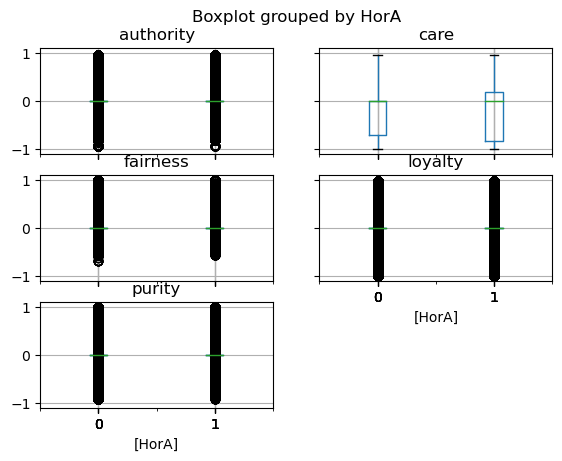

In [11]:
bplot = df[['care', 'fairness', 'loyalty', 'authority','purity','HorA']]
bplot.boxplot(by="HorA")

array([[<AxesSubplot:title={'center':'care'}>,
        <AxesSubplot:title={'center':'fairness'}>],
       [<AxesSubplot:title={'center':'loyalty'}>,
        <AxesSubplot:title={'center':'authority'}>],
       [<AxesSubplot:title={'center':'purity'}>,
        <AxesSubplot:title={'center':'HorA'}>]], dtype=object)

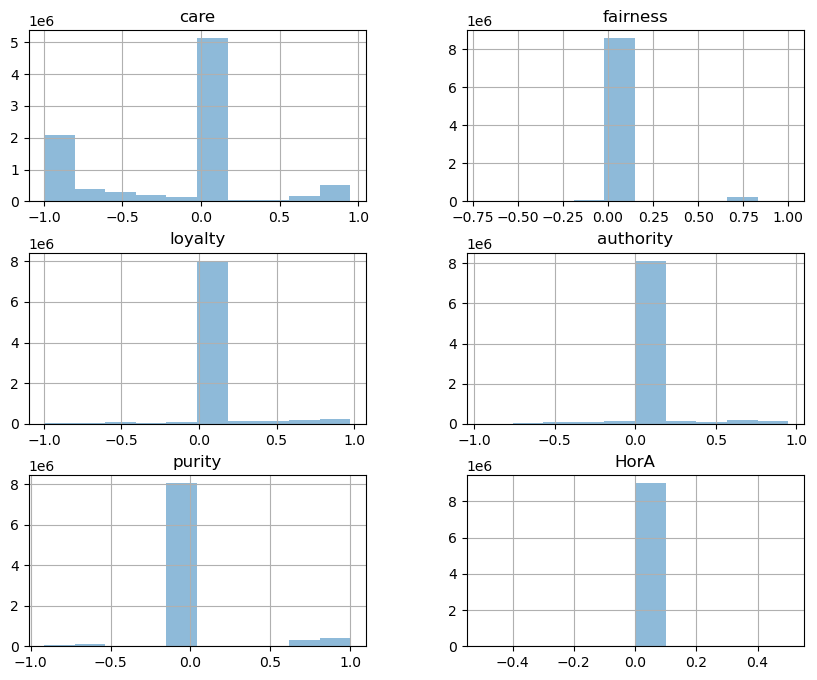

In [12]:
bplot[bplot['HorA']==0].hist(bins=10,alpha=0.5,figsize = (10,8))

array([[<AxesSubplot:title={'center':'care'}>,
        <AxesSubplot:title={'center':'fairness'}>],
       [<AxesSubplot:title={'center':'loyalty'}>,
        <AxesSubplot:title={'center':'authority'}>],
       [<AxesSubplot:title={'center':'purity'}>,
        <AxesSubplot:title={'center':'HorA'}>]], dtype=object)

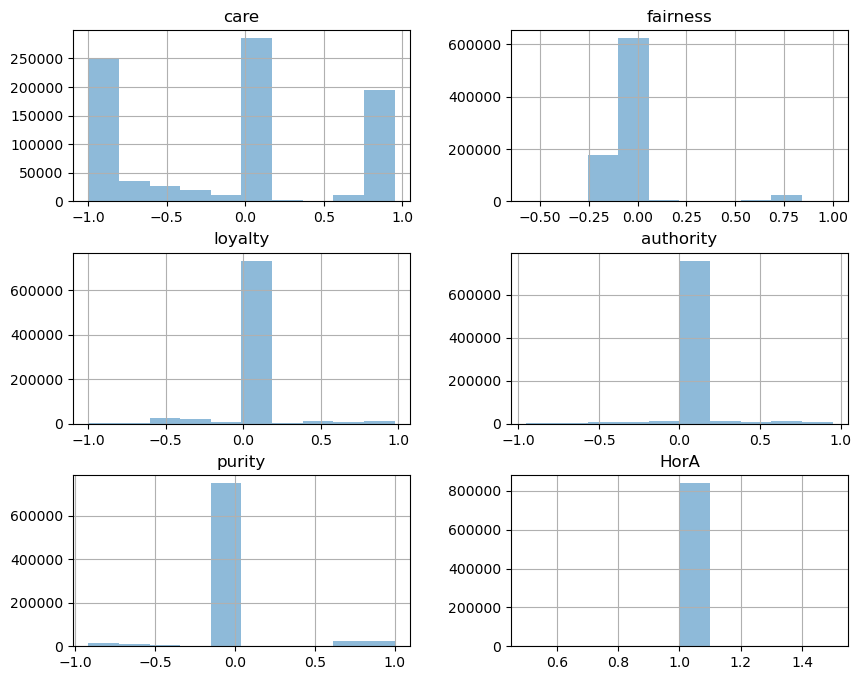

In [13]:
bplot[bplot['HorA']==1].hist(bins=10,alpha=0.5,figsize = (10,8))

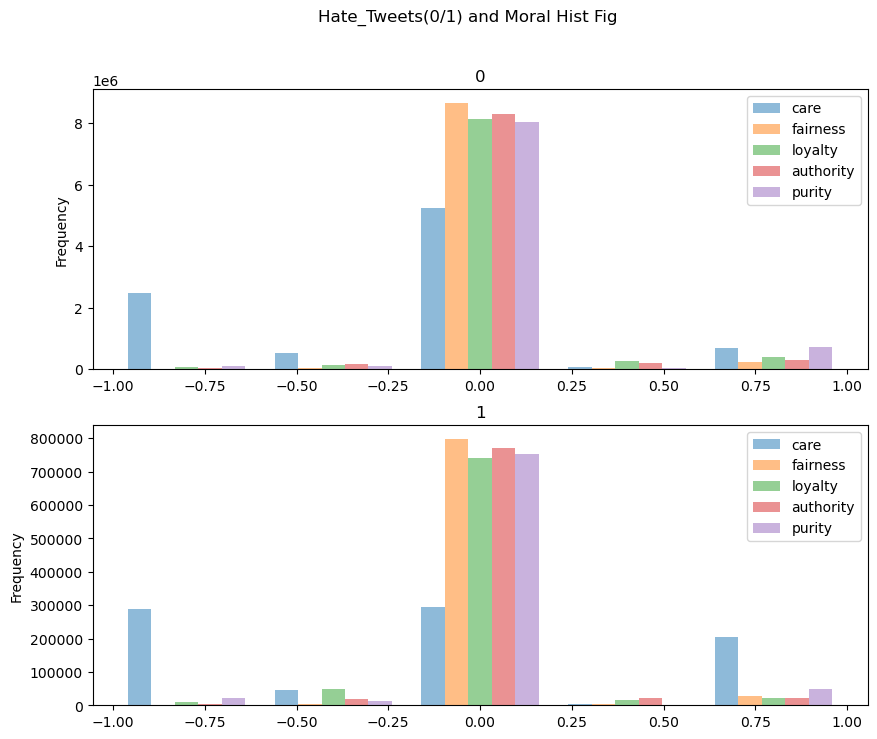

In [14]:
ax = bplot.plot.hist(by='HorA',bins=5,alpha=0.5,figsize = (10,8),title='Hate_Tweets(0/1) and Moral Hist Fig', subplots=True)


1=Subversion, 9=Authority for AUTHORITY

1=Harm, 9=Care for CARE

1=Proportionality, 9=Fairness for FAIRNESS

1=Disloyalty, 9=Loyalty for LOYALTY

1=Degradation, 9=Purity for PURITY

从直方图可以看出，对于仇恨言论，loyalty和fairness集中在左侧（背叛、欺骗）


<AxesSubplot:>

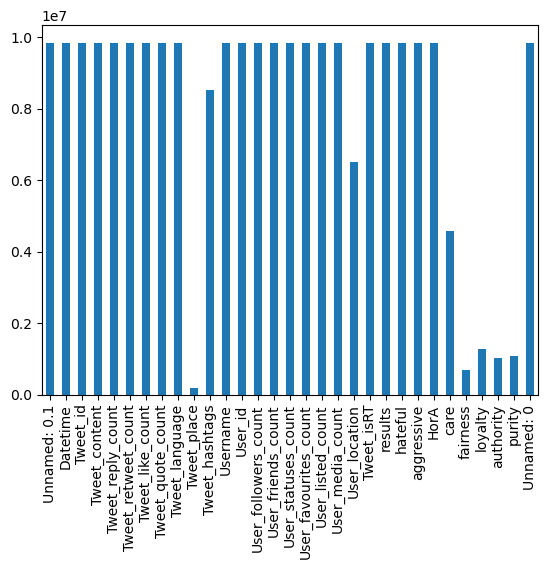

In [18]:
df.count().plot.bar()

In [28]:
df.loc[0].Datetime

'2022-02-22'

In [29]:
df.Datetime.dtype

dtype('O')

In [30]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d')

In [31]:
df.Datetime.dtype

dtype('<M8[ns]')

In [32]:
from datetime import timedelta
df.loc[0].Datetime+timedelta(days = 1)

Timestamp('2022-02-23 00:00:00')

In [33]:
df.loc[0].Datetime

Timestamp('2022-02-22 00:00:00')

<AxesSubplot:ylabel='Density'>

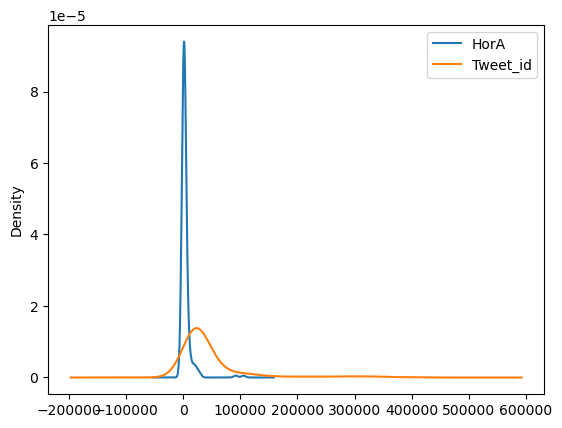

In [34]:
df.pivot_table(index = 'Datetime', values=['HorA','authority','care','fairness','loyalty','purity','Tweet_id'],
               aggfunc={'HorA':np.sum, 'Tweet_id':len }).plot.density()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>],
      dtype=object)

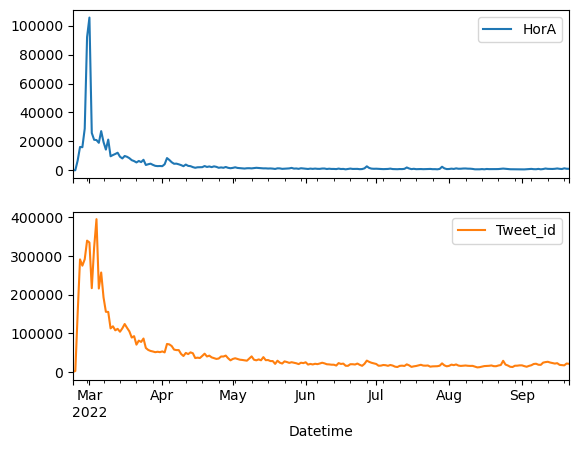

In [35]:
df.pivot_table(index = 'Datetime', values=['HorA','authority','care','fairness','loyalty','purity','Tweet_id'],
               aggfunc={'HorA':np.sum, 'Tweet_id':len }).plot.line(subplots=True)

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

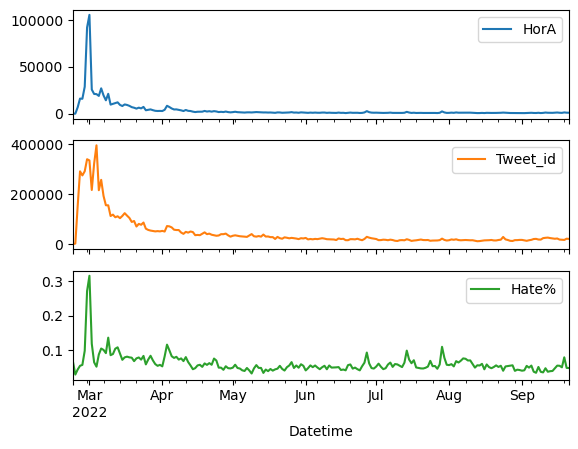

In [36]:
#加入仇恨推文占总推文的比例历时图
ptable = df.pivot_table(index = 'Datetime', values=['HorA','Tweet_id'],
               aggfunc={'HorA':np.sum, 'Tweet_id':len })
ptable['Hate%'] = ptable.apply(lambda x: x['HorA'] / x['Tweet_id'], axis=1)
ptable.plot.line(subplots=True)

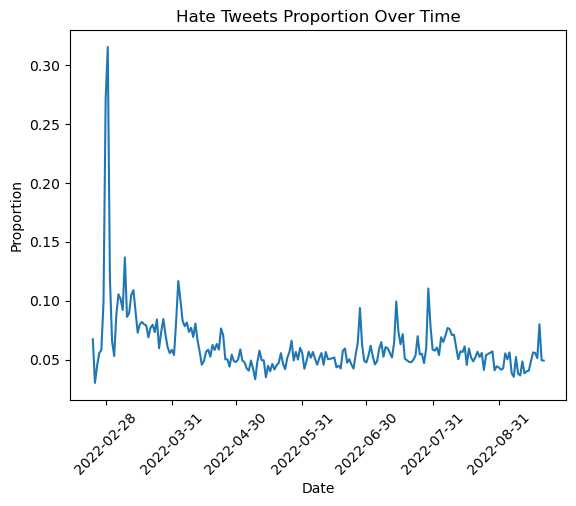

In [43]:
import matplotlib.pyplot as plt

plt.plot(ptable.index, ptable['Hate%'])
plt.xticks(pd.date_range(ptable.index[0],ptable.index[-1],freq = 'M'),rotation = 45)
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title('Hate Tweets Proportion Over Time')
plt.savefig('Hate_Tweets_Proportion_Over_Time.png',dpi=300, bbox_inches='tight')
plt.show()

In [49]:
ptable.describe()

,HorA,Tweet_id,Hate%
count,212.000000,212.000000,212.000000
mean,3954.174528,46427.584906,0.061780
std,10486.292299,63619.664569,0.028572
min,26.000000,387.000000,0.030125
25%,925.000000,16975.000000,0.048637
50%,1215.000000,22779.500000,0.055513
75%,2523.500000,41488.000000,0.067595
max,105609.000000,395145.000000,0.315452


In [50]:
ptable.sort_values(by='Hate%',ascending=False)

,HorA,Tweet_id,Hate%
Datetime,,,
2022-03-01,105609,334786,0.315452
2022-02-28,92134,339623,0.271283
2022-03-09,21246,155389,0.136728
2022-03-02,25819,216732,0.119129
2022-04-03,8460,72582,0.116558
...,...,...,...
2022-09-10,887,24335,0.036450
2022-09-07,757,21439,0.035309
2022-05-14,1348,38591,0.034930


In [44]:
ptable.to_csv('Hate_Tweet_Distribution.csv')

<AxesSubplot:ylabel='Density'>

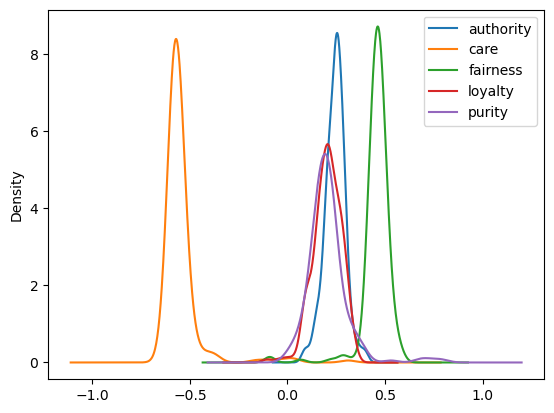

In [37]:
df.pivot_table(index = 'Datetime', values=['authority','care','fairness','loyalty','purity'],
               aggfunc={'authority':np.mean,'care':np.mean,'fairness':np.mean,'loyalty':np.mean,'purity':np.mean,}).plot.density()

In [45]:
ptable2 = df.pivot_table(index = 'Datetime', values=['authority','care','fairness','loyalty','purity'],
               aggfunc={'authority':np.mean,'care':np.mean,'fairness':np.mean,'loyalty':np.mean,'purity':np.mean,})

In [46]:
ptable2.to_csv('Moral_Tweets_Distribution.csv')

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [96]:
df['authority']=df['authority'].fillna(0)
df['care']=df['care'].fillna(0)
df['fairness']=df['fairness'].fillna(0)
df['loyalty']=df['loyalty'].fillna(0)
df['purity']=df['purity'].fillna(0)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

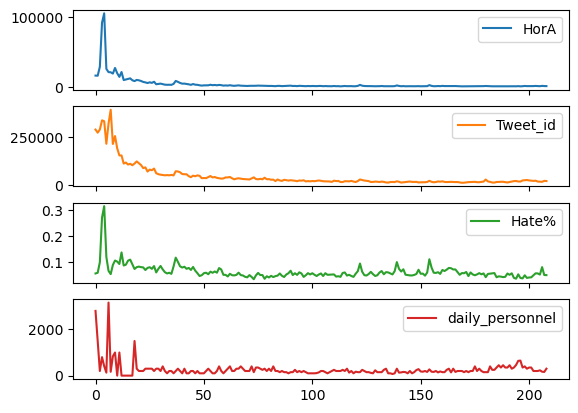

In [154]:
ptable[['HorA','Tweet_id','Hate%','daily_personnel']].plot.line(subplots=True)

## 构建活跃用户panel data

In [14]:
df.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,User_listed_count,User_media_count,hateful,aggressive,HorA,care,fairness,loyalty,authority,purity
0,0,2022-02-22,1496090169229058054,Russian troops enter eastern Ukraine russia u...,0,0,0,0,"['Russia', 'Ukraine', 'UkraineConflict', 'Ukra...",HimanRoy14,...,0,364,0,0,0,1.666667,NaN,NaN,4.75,NaN
1,1,2022-02-22,1496093418870951937,"Iran urges restraint in Ukraine crisis, blames...",0,0,0,0,"['Iran', 'UkraineRussiaCrisis', 'Ukraine', 'Uk...",theasialive,...,1,194,0,0,0,NaN,NaN,NaN,NaN,NaN
2,2,2022-02-22,1496094215000195073,Current Affairs emoji cara revolviéndose de l...,22,225,913,21,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCri...",SonaliS71687712,...,0,1072,0,0,0,1.666667,NaN,NaN,NaN,NaN
3,3,2022-02-22,1496094912215130116,russian President vladimir putin has ordered...,1,0,0,0,"['Russian', 'VladimirPutin', 'Ukraine', 'Ukrai...",TheHoardPlanet,...,1,196,0,0,0,1.666667,NaN,NaN,5.25,NaN
4,4,2022-02-22,1496097094352121866,Putin calls Ukrainian statehood a fiction. His...,0,0,1,0,"['Russia', 'RussiaUkraineCrisis', 'RussiaUcrai...",theasialive,...,1,194,0,0,0,NaN,NaN,NaN,NaN,NaN


In [157]:
from datetime import timedelta
end_time = df.loc[0].Datetime+timedelta(days = 7)

In [161]:
df.iloc[-1].Datetime - df.iloc[0].Datetime

Timedelta('199 days 00:00:00')

In [188]:
#cut time series by 7 days
ini_time = df.iloc[0].Datetime
end_time = df.iloc[-1].Datetime
time_series_7day = []

while ini_time < end_time:
    time_series_7day.append(ini_time)
    ini_time = ini_time+timedelta(days=7)
    
time_series_7day.append(end_time+timedelta(days=1))

In [189]:
time_series_7day

[Timestamp('2022-02-22 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-03-08 00:00:00'),
 Timestamp('2022-03-15 00:00:00'),
 Timestamp('2022-03-22 00:00:00'),
 Timestamp('2022-03-29 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-12 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-04-26 00:00:00'),
 Timestamp('2022-05-03 00:00:00'),
 Timestamp('2022-05-10 00:00:00'),
 Timestamp('2022-05-17 00:00:00'),
 Timestamp('2022-05-24 00:00:00'),
 Timestamp('2022-05-31 00:00:00'),
 Timestamp('2022-06-07 00:00:00'),
 Timestamp('2022-06-14 00:00:00'),
 Timestamp('2022-06-21 00:00:00'),
 Timestamp('2022-06-28 00:00:00'),
 Timestamp('2022-07-05 00:00:00'),
 Timestamp('2022-07-12 00:00:00'),
 Timestamp('2022-07-19 00:00:00'),
 Timestamp('2022-07-26 00:00:00'),
 Timestamp('2022-08-02 00:00:00'),
 Timestamp('2022-08-09 00:00:00'),
 Timestamp('2022-08-16 00:00:00'),
 Timestamp('2022-08-23 00:00:00'),
 Timestamp('2022-08-30 00:00:00'),
 Timestamp('2022-09-

In [190]:
df['7day_cut'] = pd.cut(df['Datetime'], bins=time_series_7day, include_lowest=True, right=False)     

In [191]:
df['7day_cut']

0          [2022-02-22, 2022-03-01)
1          [2022-02-22, 2022-03-01)
2          [2022-02-22, 2022-03-01)
3          [2022-02-22, 2022-03-01)
4          [2022-02-22, 2022-03-01)
                     ...           
9842643    [2022-09-06, 2022-09-10)
9842644    [2022-09-06, 2022-09-10)
9842645    [2022-09-06, 2022-09-10)
9842646    [2022-09-06, 2022-09-10)
9842647    [2022-09-06, 2022-09-10)
Name: 7day_cut, Length: 9842648, dtype: category
Categories (29, interval[datetime64[ns], left]): [[2022-02-22, 2022-03-01) < [2022-03-01, 2022-03-08) < [2022-03-08, 2022-03-15) < [2022-03-15, 2022-03-22) ... [2022-08-16, 2022-08-23) < [2022-08-23, 2022-08-30) < [2022-08-30, 2022-09-06) < [2022-09-06, 2022-09-10)]

In [195]:
label_7day = df['7day_cut'].unique()
label_7day[0]

Interval('2022-02-22', '2022-03-01', closed='left')

In [197]:
df[df['7day_cut']==label_7day[0]].head()

,Unnamed: 0.1,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_language,Tweet_place,...,loyalty,authority,purity,Unnamed: 0,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,7day_cut
0,0,2022-02-22,1496090169229058054,Russian troops enter eastern Ukraine russia u...,0,0,0,0,en,NaN,...,0.0,4.75,0.0,NaN,Mixed,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)"
1,1,2022-02-22,1496093418870951937,"Iran urges restraint in Ukraine crisis, blames...",0,0,0,0,en,NaN,...,0.0,0.00,0.0,NaN,Non,Non,Non,Non,Non,"[2022-02-22, 2022-03-01)"
2,2,2022-02-22,1496094215000195073,Current Affairs emoji cara revolviéndose de l...,22,225,913,21,en,NaN,...,0.0,0.00,0.0,NaN,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)"
3,3,2022-02-22,1496094912215130116,russian President vladimir putin has ordered...,1,0,0,0,en,NaN,...,0.0,5.25,0.0,NaN,Mixed,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)"
4,4,2022-02-22,1496097094352121866,Putin calls Ukrainian statehood a fiction. His...,0,0,1,0,en,NaN,...,0.0,0.00,0.0,NaN,Non,Non,Non,Non,Non,"[2022-02-22, 2022-03-01)"


In [199]:
user_list = df[df['7day_cut']==label_7day[0]].User_id.tolist()
for i in label_7day:
    user_list2 = df[df['7day_cut']==i].User_id.tolist()
    user_list = list(set(user_list) & set(user_list2))
    

In [200]:
user_list

[]

In [211]:
#cut time series by 14 days
ini_time = df.iloc[0].Datetime
end_time = df.iloc[-1].Datetime
time_series_14day = []

while ini_time < end_time:
    time_series_14day.append(ini_time)
    ini_time = ini_time+timedelta(days=14)
    
time_series_14day.append(end_time+timedelta(days=1))

df['14day_cut'] = pd.cut(df['Datetime'], bins=time_series_14day, include_lowest=True, right=False)

label_14day = df['14day_cut'].unique()

user_list_14 = df[df['14day_cut']==label_14day[0]].User_id.tolist()
for i in label_14day[:-1]:
    user_list2 = df[df['14day_cut']==i].User_id.tolist()
    user_list_14 = list(set(user_list_14) & set(user_list2))
    
len(user_list_14)

0

In [213]:
#cut time series by 30 days
ini_time = df.iloc[0].Datetime
end_time = df.iloc[-1].Datetime
time_series_30day = []

while ini_time < end_time:
    time_series_30day.append(ini_time)
    ini_time = ini_time+timedelta(days=30)
    
time_series_30day.append(end_time+timedelta(days=1))

df['30day_cut'] = pd.cut(df['Datetime'], bins=time_series_30day, include_lowest=True, right=False)

label_30day = df['30day_cut'].unique()

user_list_30 = df[df['30day_cut']==label_30day[0]].User_id.tolist()
for i in label_30day[:-1]:
    user_list2 = df[df['30day_cut']==i].User_id.tolist()
    user_list_30 = list(set(user_list_30) & set(user_list2))
    
len(user_list_30)

13496

In [214]:
#cut time series by 60 days
ini_time = df.iloc[0].Datetime
end_time = df.iloc[-1].Datetime
time_series_60day = []

while ini_time < end_time:
    time_series_60day.append(ini_time)
    ini_time = ini_time+timedelta(days=60)
    
time_series_60day.append(end_time+timedelta(days=1))

df['60day_cut'] = pd.cut(df['Datetime'], bins=time_series_60day, include_lowest=True, right=False)

label_60day = df['60day_cut'].unique()

user_list_60 = df[df['60day_cut']==label_60day[0]].User_id.tolist()
for i in label_60day[:-1]:
    user_list2 = df[df['60day_cut']==i].User_id.tolist()
    user_list_60 = list(set(user_list_60) & set(user_list2))
    
len(user_list_60)

27599

In [216]:
df_active30 = df[df['User_id'].isin(user_list_30)]

In [217]:
df_active30.head()

,Unnamed: 0.1,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_language,Tweet_place,...,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,7day_cut,14day_cut,30day_cut,60day_cut,90day_cut
6,6,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,en,NaN,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
7,7,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,en,NaN,...,Non,Care,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
12,12,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,en,NaN,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
26,26,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,en,NaN,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
27,27,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,en,NaN,...,Non,Non,Non,Degradation,Mixed,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"


In [220]:
len(df_active30)

2730753

13496名活跃用户每月都发关于俄乌战争的推特，共发了2730753条，这些用户中极可能有大量水军和新闻账号

In [223]:
df_active30.to_csv("active_User_per_30_days.csv")

In [7]:
#logit regression
import statsmodels.api as sm

# 读取数据
data = df[['HorA','care','authority','fairness','loyalty','purity']]

# 拆分数据集
X = data[['care', 'fairness', 'authority', 'purity', 'loyalty']]
y = data['HorA']

# 添加截距项
X = sm.add_constant(X)

# 拟合线性回归模型
linear_model = sm.Logit(y, X)
result = linear_model.fit()

# 打印结果
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.283562
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   HorA   No. Observations:              9842648
Model:                          Logit   Df Residuals:                  9842642
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                 0.02628
Time:                        10:07:12   Log-Likelihood:            -2.7910e+06
converged:                       True   LL-Null:                   -2.8663e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2878      0.001  -1828.310      0.000      -2.290      -2.285
care           0.3118      0.

In [10]:
#自变量之间的共线性检验
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将需要检测的变量放入一个列表中
variables = ['care', 'fairness', 'authority', 'purity', 'loyalty']

# 创建一个新的DataFrame，只包含需要检测的变量
new_df = df[variables]

# 计算VIF值
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
vif["features"] = new_df.columns

# 输出结果
print(vif)

   VIF Factor   features
0    1.047730       care
1    1.013607   fairness
2    1.011358  authority
3    1.033003     purity
4    1.010556    loyalty


## 衡量道德叙事与仇恨言论的传播

In [7]:
df.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,User_listed_count,User_media_count,hateful,aggressive,HorA,care,fairness,loyalty,authority,purity
0,0,2022-02-22,1496090169229058054,Russian troops enter eastern Ukraine russia u...,0,0,0,0,"['Russia', 'Ukraine', 'UkraineConflict', 'Ukra...",HimanRoy14,...,0,364,0,0,0,-0.833333,0.0,0.0,-0.0625,0.0
1,1,2022-02-22,1496093418870951937,"Iran urges restraint in Ukraine crisis, blames...",0,0,0,0,"['Iran', 'UkraineRussiaCrisis', 'Ukraine', 'Uk...",theasialive,...,1,194,0,0,0,0.000000,0.0,0.0,0.0000,0.0
2,2,2022-02-22,1496094215000195073,Current Affairs emoji cara revolviéndose de l...,22,225,913,21,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCri...",SonaliS71687712,...,0,1072,0,0,0,-0.833333,0.0,0.0,0.0000,0.0
3,3,2022-02-22,1496094912215130116,russian President vladimir putin has ordered...,1,0,0,0,"['Russian', 'VladimirPutin', 'Ukraine', 'Ukrai...",TheHoardPlanet,...,1,196,0,0,0,-0.833333,0.0,0.0,0.0625,0.0
4,4,2022-02-22,1496097094352121866,Putin calls Ukrainian statehood a fiction. His...,0,0,1,0,"['Russia', 'RussiaUkraineCrisis', 'RussiaUcrai...",theasialive,...,1,194,0,0,0,0.000000,0.0,0.0,0.0000,0.0


In [8]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_hashtags', 'Username', 'User_id',
       'User_followers_count', 'User_friends_count', 'User_statuses_count',
       'User_favourites_count', 'User_listed_count', 'User_media_count',
       'hateful', 'aggressive', 'HorA', 'care', 'fairness', 'loyalty',
       'authority', 'purity'],
      dtype='object')

In [20]:
#linear regression for reply
import statsmodels.api as sm
# 读取数据
data = df[['HorA','care','authority','fairness','loyalty','purity','Tweet_reply_count','Tweet_retweet_count','Tweet_quote_count','Tweet_like_count','User_followers_count', 'User_friends_count']]

# 拆分数据集
X = data[['care', 'fairness', 'authority', 'purity', 'loyalty','HorA','User_followers_count', 'User_friends_count']]
y = data['Tweet_reply_count']

# 添加截距项
X = sm.add_constant(X)

# 拟合线性回归模型
linear_model = sm.OLS(y, X)
result = linear_model.fit()

# 打印结果
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Tweet_reply_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     899.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:05:17   Log-Likelihood:            -4.9935e+07
No. Observations:             9842648   AIC:                         9.987e+07
Df Residuals:                 9842639   BIC:                         9.987e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7848 

In [37]:
#会不会是量纲的问题？
# 读取数据
data = df[['HorA','care','authority','fairness','loyalty','purity','Tweet_reply_count','Tweet_retweet_count','Tweet_quote_count','Tweet_like_count','User_followers_count', 'User_friends_count']]
from scipy import stats
import statsmodels.formula.api as smf

# standardizing dataframe
data_z = data.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

# fitting regression
formula = 'Tweet_reply_count ~ care + authority + fairness + purity+ User_followers_count + User_friends_count + HorA'
result = smf.ols(formula, data=data_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Tweet_reply_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1022.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:50:50   Log-Likelihood:            -1.3963e+07
No. Observations:             9842648   AIC:                         2.793e+07
Df Residuals:                 9842640   BIC:                         2.793e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.406e-15      0.000  -4.41e-12      1.000      -0.001       0.001
care                 -8.569e-06      0.000     -0.026      0.979      -0.001       0.001
authority                0.0017      0.000      5.474      0.000       0.001       0.002
fairness                 0.0011      0.000      3.396      0.001       0.000       0.002
purity                  -0.0023      0.000     -6.801      0.000      -0.003      -0.002
User_followers_count     0.0260      0.000     81.569      0.000       0.025       0.027
User_friends_count       0.0049      0.000     15.376      0.000       0.004       0.006
HorA                    -0.0029      0.000     -9.205      0.000      -0.004      -0.002
===================================================================================
Omnibus:                 81740482.955   Durbin-Watson:                        2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   5755644063850225664.000
Skew:                        1636.512   Prob(JB):                              0.00
Kurtosis:                 3746250.297   Cond. No.                              1.33
===================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#会不会是量纲的问题？
# 读取数据
data = df[['HorA','care','authority','fairness','loyalty','purity','Tweet_reply_count','Tweet_retweet_count','Tweet_quote_count','Tweet_like_count','User_followers_count', 'User_friends_count']]
from scipy import stats
import statsmodels.formula.api as smf

# standardizing dataframe
data_z = data.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

# fitting regression
formula = 'Tweet_retweet_count ~ care + authority + fairness + purity+ User_followers_count + User_friends_count + HorA'
result = smf.ols(formula, data=data_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Tweet_retweet_count   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     294.7
Date:                 Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                         10:52:26   Log-Likelihood:            -1.3965e+07
No. Observations:              9842648   AIC:                         2.793e+07
Df Residuals:                  9842640   BIC:                         2.793e+07
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              2.97e-15      0.000   9.32e-12      1.000      -0.001       0.001
care                     0.0025      0.000      7.620      0.000       0.002       0.003
authority               -0.0003      0.000     -0.971      0.331      -0.001       0.000
fairness                -0.0007      0.000     -2.312      0.021      -0.001      -0.000
purity                  -0.0040      0.000    -12.057      0.000      -0.005      -0.003
User_followers_count     0.0128      0.000     40.129      0.000       0.012       0.013
User_friends_count       0.0023      0.000      7.151      0.000       0.002       0.003
HorA                    -0.0047      0.000    -14.516      0.000      -0.005      -0.004
================================================================================
Omnibus:                 51746539.518   Durbin-Watson:                     1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   4317287781398395.000
Skew:                         258.150   Prob(JB):                           0.00
Kurtosis:                  102603.540   Cond. No.                           1.33
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([ 850383.,  956162., 1961784., 2711682., 2178612.,  844388.,
         240980.,   69082.,   22573.,    7002.]),
 array([ 0.        ,  1.79268041,  3.58536082,  5.37804123,  7.17072164,
         8.96340205, 10.75608246, 12.54876287, 14.34144328, 16.13412369,
        17.9268041 ]),
 <BarContainer object of 10 artists>)

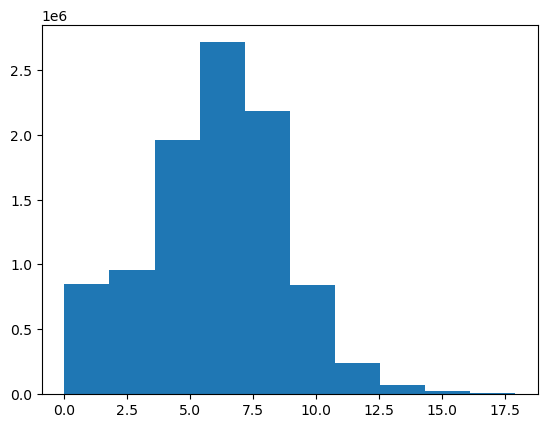

In [9]:
plt.hist(np.log(df['User_followers_count']+1))

In [10]:
df['User_followers_count_log']=np.log(df['User_followers_count']+1)
df['User_friends_count_log']=np.log(df['User_friends_count']+1)

In [57]:
#仇恨言论中的道德叙事如何影响它的传播？
# 读取数据
data_hate = df[df['HorA']==1]
from scipy import stats
import statsmodels.formula.api as smf

# fitting regression
formula = 'Tweet_retweet_count ~ care + authority + fairness + purity + loyalty + User_followers_count_log'
result = smf.ols(formula, data=data_hate).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Tweet_retweet_count   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     647.2
Date:                 Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                         11:15:29   Log-Likelihood:            -4.4952e+06
No. Observations:               838285   AIC:                         8.991e+06
Df Residuals:                   838278   BIC:                         8.991e+06
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.1856      0.110    -38.138      0.000      -4.401      -3.971
care                         0.4073      0.099      4.116      0.000       0.213       0.601
authority                   -0.1171      0.337     -0.347      0.728      -0.778       0.544
fairness                    -1.3806      0.348     -3.962      0.000      -2.064      -0.698
purity                       0.2965      0.239      1.239      0.215      -0.173       0.766
loyalty                      1.0104      0.277      3.650      0.000       0.468       1.553
User_followers_count_log     1.3224      0.022     60.802      0.000       1.280       1.365
===============================================================================
Omnibus:                  4309884.416   Durbin-Watson:                    1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   270556987169949.531
Skew:                         238.177   Prob(JB):                          0.00
Kurtosis:                   88013.156   Cond. No.                          32.5
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#非仇恨言论中的道德叙事如何影响它的传播？
# 读取数据
data_nonhate = df[df['HorA']==0]
from scipy import stats
import statsmodels.formula.api as smf

# fitting regression
formula = 'Tweet_retweet_count ~ care + authority + fairness + purity + loyalty + User_followers_count_log'
result = smf.ols(formula, data=data_nonhate).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Tweet_retweet_count   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     834.0
Date:                 Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                         11:18:50   Log-Likelihood:            -6.2805e+07
No. Observations:              9004363   AIC:                         1.256e+08
Df Residuals:                  9004356   BIC:                         1.256e+08
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.0076      0.230    -34.795      0.000      -8.459      -7.557
care                         2.4374      0.196     12.438      0.000       2.053       2.822
authority                   -0.9730      0.489     -1.989      0.047      -1.932      -0.014
fairness                    -2.0085      0.643     -3.124      0.002      -3.269      -0.749
purity                       1.3729      0.384      3.578      0.000       0.621       2.125
loyalty                     -0.8426      0.414     -2.033      0.042      -1.655      -0.030
User_followers_count_log     2.3075      0.033     69.199      0.000       2.242       2.373
================================================================================
Omnibus:                 46829370.157   Durbin-Watson:                     1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   3359455483091771.000
Skew:                         248.262   Prob(JB):                           0.00
Kurtosis:                   94628.370   Cond. No.                           50.5
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([5644., 2879., 1486.,  748.,  399.,  221.,  394.,   29.,   17.,
          22.]),
 array([ 6.2146081 ,  6.77780881,  7.34100953,  7.90421025,  8.46741096,
         9.03061168,  9.5938124 , 10.15701311, 10.72021383, 11.28341455,
        11.84661526]),
 <BarContainer object of 10 artists>)

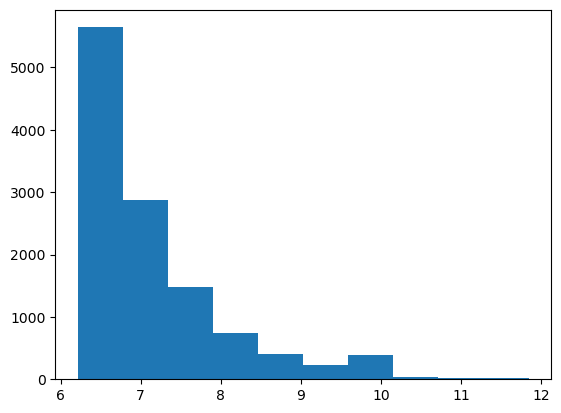

In [12]:
plt.hist(np.log(df.Tweet_retweet_count[df.Tweet_retweet_count>=500]))

In [10]:
#道德叙事如何影响它的传播？
# 读取数据
from scipy import stats
import statsmodels.formula.api as smf

# fitting regression
# 将仇恨言论与否视为完全交互项进行分层分析
formula = 'Tweet_retweet_count ~ HorA*care + HorA*authority + HorA*fairness + HorA*purity + HorA*loyalty + HorA*User_followers_count_log'
result = smf.ols(formula, data=df).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Tweet_retweet_count   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     448.5
Date:                 Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                         10:09:48   Log-Likelihood:            -6.8232e+07
No. Observations:              9842648   AIC:                         1.365e+08
Df Residuals:                  9842634   BIC:                         1.365e+08
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.0076      0.221    -36.311      0.000      -8.440      -7.575
HorA                              3.8220      0.572      6.685      0.000       2.701       4.942
care                              2.4374      0.188     12.980      0.000       2.069       2.805
HorA:care                        -2.0301      0.511     -3.970      0.000      -3.032      -1.028
authority                        -0.9730      0.469     -2.076      0.038      -1.892      -0.054
HorA:authority                    0.8559      1.687      0.507      0.612      -2.451       4.163
fairness                         -2.0085      0.616     -3.260      0.001      -3.216      -0.801
HorA:fairness                     0.6279      1.784      0.352      0.725      -2.869       4.125
purity                            1.3729      0.368      3.734      0.000       0.652       2.094
HorA:purity                      -1.0764      1.208     -0.891      0.373      -3.443       1.290
loyalty                          -0.8426      0.397     -2.122      0.034      -1.621      -0.064
HorA:loyalty                      1.8530      1.388      1.335      0.182      -0.868       4.574
User_followers_count_log          2.3075      0.032     72.215      0.000       2.245       2.370
HorA:User_followers_count_log    -0.9851      0.109     -9.013      0.000      -1.199      -0.771
================================================================================
Omnibus:                 51755368.282   Durbin-Watson:                     1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   4324621089443008.500
Skew:                         258.310   Prob(JB):                           0.00
Kurtosis:                  102690.641   Cond. No.                           152.
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

https://www.lianxh.cn/news/2144066aaa0b4.html

In [ ]:
#使用零膨胀泊松回归
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedPoisson

formula = 'Tweet_retweet_count ~ HorA*care + HorA*authority + HorA*fairness + HorA*purity + HorA*loyalty + HorA*User_followers_count_log'
results = ZeroInflatedPoisson.from_formula(formula, df).fit(maxiter=1000, method='lbfgs')
print(results.summary())

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\discrete\count_model.py:522: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
D:\Anaconda\lib\site-packages\statsmodels\discrete\count_model.py:530: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
D:\Anaconda\lib\site-packages\statsmodels\discrete\count_model.py:531: RuntimeWarning: overflow encountered in square
  coeff**2)).sum() - (mu[nonzero_idx] * self.exog[nonzero_idx, i] *
D:\Anaconda\lib\site-packages\statsmodels\discrete\count_model.py:530: RuntimeWarning: invalid value encountered in true_divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWa

In [13]:
df[['Tweet_retweet_count']].describe()

,Tweet_retweet_count
count,9.842648e+06
mean,5.319980e+00
std,2.480489e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.396110e+05


In [21]:
df[['Tweet_retweet_count']].sort_values(by='Tweet_retweet_count',ascending=False)

,Tweet_retweet_count
132654,139611
206990,139527
350934,139522
337397,139519
3641325,138226
...,...
3787926,0
3787924,0
3787920,0
3787919,0


In [11]:
#因为转发越多越困难，所以即便做了对数处理也不会接近正态分布，考虑将是否被转发作为二分变量，看仇恨言论、道德叙事会不会影响一条推特被转发的概率
df['Tweet_be_retweet'] = df.Tweet_retweet_count.apply(lambda x: (x>0)+0)
df['Tweet_be_retweet_50'] = df.Tweet_retweet_count.apply(lambda x: (x>=50)+0)
df['Tweet_be_retweet_100'] = df.Tweet_retweet_count.apply(lambda x: (x>=100)+0)
df['Tweet_be_retweet_500'] = df.Tweet_retweet_count.apply(lambda x: (x>=500)+0)
df['Tweet_be_retweet_1000'] = df.Tweet_retweet_count.apply(lambda x: (x>=1000)+0)

In [16]:
df.Tweet_be_retweet_1000.value_counts()

0    9837329
1       5319
Name: Tweet_be_retweet_1000, dtype: int64

In [12]:
df.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,loyalty,authority,purity,User_followers_count_log,User_friends_count_log,Tweet_be_retweet,Tweet_be_retweet_50,Tweet_be_retweet_100,Tweet_be_retweet_500,Tweet_be_retweet_1000
0,0,2022-02-22,1496090169229058054,Russian troops enter eastern Ukraine russia u...,0,0,0,0,"['Russia', 'Ukraine', 'UkraineConflict', 'Ukra...",HimanRoy14,...,0.0,-0.0625,0.0,3.178054,5.407172,0,0,0,0,0
1,1,2022-02-22,1496093418870951937,"Iran urges restraint in Ukraine crisis, blames...",0,0,0,0,"['Iran', 'UkraineRussiaCrisis', 'Ukraine', 'Uk...",theasialive,...,0.0,0.0000,0.0,4.564348,2.484907,0,0,0,0,0
2,2,2022-02-22,1496094215000195073,Current Affairs emoji cara revolviéndose de l...,22,225,913,21,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCri...",SonaliS71687712,...,0.0,0.0000,0.0,7.740664,7.954021,1,1,1,0,0
3,3,2022-02-22,1496094912215130116,russian President vladimir putin has ordered...,1,0,0,0,"['Russian', 'VladimirPutin', 'Ukraine', 'Ukrai...",TheHoardPlanet,...,0.0,0.0625,0.0,3.761200,2.397895,0,0,0,0,0
4,4,2022-02-22,1496097094352121866,Putin calls Ukrainian statehood a fiction. His...,0,0,1,0,"['Russia', 'RussiaUkraineCrisis', 'RussiaUcrai...",theasialive,...,0.0,0.0000,0.0,4.564348,2.484907,0,0,0,0,0


In [13]:
#道德叙事如何影响它的传播？
# 读取数据
from scipy import stats
import statsmodels.formula.api as smf

# fitting regression
formula = 'Tweet_be_retweet ~ HorA+ care + authority + fairness + purity + loyalty + User_followers_count_log'
result = smf.logit(formula, data=df).fit()

# checking results
result.summary()

Optimization terminated successfully.
         Current function value: 0.475351
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Tweet_be_retweet   No. Observations:              9842648
Model:                          Logit   Df Residuals:                  9842640
Method:                           MLE   Df Model:                            7
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.1496
Time:                        16:55:34   Log-Likelihood:            -4.6787e+06
converged:                       True   LL-Null:                   -5.5020e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -3.8275      0.003  -1317.503      0.000      -3.833      -3.822
HorA                        -0.2698      0.004    -75.527      0.000      -0.277      -0.263
care                        -0.3004      0.002   -162.276      0.000      -0.304      -0.297
authority                    0.1180      0.004     26.657      0.000       0.109       0.127
fairness                     0.0710      0.006     12.128      0.000       0.060       0.082
purity                      -0.1182      0.004    -28.638      0.000      -0.126      -0.110
loyalty                      0.2926      0.004     78.525      0.000       0.285       0.300
User_followers_count_log     0.4002      0.000   1051.628      0.000       0.399       0.401
============================================================================================
"""

In [18]:
#道德叙事如何影响它的传播？
# 读取数据
from scipy import stats
import statsmodels.formula.api as smf

# fitting regression
# 将仇恨言论与否视为完全交互项进行分层分析
formula = 'Tweet_be_retweet ~ HorA*care + HorA*authority + HorA*fairness + HorA*purity + HorA*loyalty + HorA*User_followers_count_log'
result = smf.logit(formula, data=df).fit()

# checking results
result.summary()

Optimization terminated successfully.
         Current function value: 0.475216
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Tweet_be_retweet   No. Observations:              9842648
Model:                          Logit   Df Residuals:                  9842634
Method:                           MLE   Df Model:                           13
Date:                Tue, 16 May 2023   Pseudo R-squ.:                  0.1499
Time:                        13:52:35   Log-Likelihood:            -4.6774e+06
converged:                       True   LL-Null:                   -5.5020e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.8157      0.003  -1272.881      0.000      -3.822      -3.810
HorA                             -0.3559      0.011    -32.921      0.000      -0.377      -0.335
care                             -0.2781      0.002   -143.476      0.000      -0.282      -0.274
HorA:care                        -0.2313      0.007    -33.427      0.000      -0.245      -0.218
authority                         0.1241      0.005     27.165      0.000       0.115       0.133
HorA:authority                   -0.1096      0.018     -5.970      0.000      -0.146      -0.074
fairness                          0.0026      0.006      0.423      0.672      -0.010       0.015
HorA:fairness                     0.5898      0.019     30.339      0.000       0.552       0.628
purity                           -0.1273      0.004    -29.508      0.000      -0.136      -0.119
HorA:purity                       0.0502      0.015      3.434      0.001       0.022       0.079
loyalty                           0.3045      0.004     79.303      0.000       0.297       0.312
HorA:loyalty                     -0.2201      0.016    -13.989      0.000      -0.251      -0.189
User_followers_count_log          0.3995      0.000   1016.858      0.000       0.399       0.400
HorA:User_followers_count_log     0.0008      0.002      0.517      0.605      -0.002       0.004
=================================================================================================
"""

从主效应来看，当一条推特属于仇恨言论时，会减少它被转发的概率。但在仇恨言论中，如果使用的“神圣/堕落”叙事出现了更多的美德词，“关心/伤害”、“权威/颠覆”、“忠诚/背叛”叙事出现了更多的恶习词，则会增加它被转发的概率。在所有的道德叙事中，除了“公平/欺骗”外，其他叙事的主效应对推特转发概率的影响都显著，其中“关心/伤害”“神圣/堕落”叙事的正面强度越高（美德词越多或恶习词越少），被转发的概率越低；“权威/颠覆”和“忠诚/背叛”叙事的正面程度越高，被转发的概率越高。

In [19]:
#道德叙事如何影响它的传播？以转发量>=50为条件
# 读取数据
from scipy import stats
import statsmodels.formula.api as smf

# fitting regression
# 将仇恨言论与否视为完全交互项进行分层分析
formula = 'Tweet_be_retweet_50 ~ HorA*care + HorA*authority + HorA*fairness + HorA*purity + HorA*loyalty + HorA*User_followers_count_log'
result = smf.logit(formula, data=df).fit()

# checking results
result.summary()

Optimization terminated successfully.
         Current function value: 0.041711
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Tweet_be_retweet_50   No. Observations:              9842648
Model:                           Logit   Df Residuals:                  9842634
Method:                            MLE   Df Model:                           13
Date:                 Tue, 16 May 2023   Pseudo R-squ.:                  0.2624
Time:                         13:55:02   Log-Likelihood:            -4.1055e+05
converged:                        True   LL-Null:                   -5.5658e+05
Covariance Type:             nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -9.5705      0.013   -725.367      0.000      -9.596      -9.545
HorA                             -4.0158      0.101    -39.672      0.000      -4.214      -3.817
care                             -0.0487      0.008     -6.044      0.000      -0.064      -0.033
HorA:care                        -0.1621      0.041     -3.980      0.000      -0.242      -0.082
authority                        -0.0224      0.018     -1.220      0.222      -0.058       0.014
HorA:authority                   -0.0242      0.093     -0.260      0.795      -0.207       0.159
fairness                          0.2543      0.026      9.854      0.000       0.204       0.305
HorA:fairness                     0.3161      0.101      3.121      0.002       0.118       0.515
purity                            0.2251      0.020     11.272      0.000       0.186       0.264
HorA:purity                      -0.3300      0.079     -4.166      0.000      -0.485      -0.175
loyalty                           0.1269      0.015      8.219      0.000       0.097       0.157
HorA:loyalty                      0.1908      0.083      2.303      0.021       0.028       0.353
User_followers_count_log          0.6080      0.001    492.115      0.000       0.606       0.610
HorA:User_followers_count_log     0.4430      0.010     44.486      0.000       0.424       0.463
=================================================================================================
"""

In [20]:
#道德叙事如何影响它的传播？以转发量>=100为条件
# 读取数据
from scipy import stats
import statsmodels.formula.api as smf

# fitting regression
# 将仇恨言论与否视为完全交互项进行分层分析
formula = 'Tweet_be_retweet_100 ~ HorA*care + HorA*authority + HorA*fairness + HorA*purity + HorA*loyalty + HorA*User_followers_count_log'
result = smf.logit(formula, data=df).fit()

# checking results
result.summary()

Optimization terminated successfully.
         Current function value: 0.026815
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Tweet_be_retweet_100   No. Observations:              9842648
Model:                            Logit   Df Residuals:                  9842634
Method:                             MLE   Df Model:                           13
Date:                  Tue, 16 May 2023   Pseudo R-squ.:                  0.2506
Time:                          13:58:14   Log-Likelihood:            -2.6393e+05
converged:                         True   LL-Null:                   -3.5218e+05
Covariance Type:              nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -10.0642      0.016   -610.835      0.000     -10.096     -10.032
HorA                             -4.5765      0.137    -33.395      0.000      -4.845      -4.308
care                             -0.0121      0.010     -1.169      0.242      -0.032       0.008
HorA:care                        -0.3241      0.055     -5.854      0.000      -0.433      -0.216
authority                        -0.0480      0.024     -2.013      0.044      -0.095      -0.001
HorA:authority                    0.1379      0.122      1.135      0.257      -0.100       0.376
fairness                          0.2081      0.034      6.111      0.000       0.141       0.275
HorA:fairness                     0.4573      0.132      3.468      0.001       0.199       0.716
purity                            0.2012      0.026      7.655      0.000       0.150       0.253
HorA:purity                      -0.3426      0.104     -3.279      0.001      -0.547      -0.138
loyalty                          -0.0073      0.020     -0.360      0.719      -0.047       0.033
HorA:loyalty                      0.4320      0.109      3.979      0.000       0.219       0.645
User_followers_count_log          0.5978      0.001    399.667      0.000       0.595       0.601
HorA:User_followers_count_log     0.4817      0.013     37.363      0.000       0.456       0.507
=================================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

有两种情况会阻止系数的极大似然估计值的收敛：完全分离和几乎完全分离。通常情况下，当数据集太小而无法观测概率低的事件时，会发生分离。模型中的预测变量越多，就越可能发生分离，因为数据中的单个组的样本数量较小。

https://support.minitab.com/zh-cn/minitab/20/help-and-how-to/statistical-modeling/regression/supporting-topics/logistic-regression/what-are-complete-separation-and-quasi-complete-separation/